In [1]:
if 'libraries_imported' not in globals():
    libraries_imported = False

if libraries_imported == False:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os
    from datetime import datetime, timedelta
    from datetime import datetime
    from scipy.interpolate import make_interp_spline
    import plotly.graph_objects as go
    from scipy.signal import butter, filtfilt
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from keras_tuner import RandomSearch, HyperModel
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense
    from tensorflow.keras.callbacks import EarlyStopping
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from keras_tuner import RandomSearch, HyperModel
    from tensorflow.keras.layers import Input
    import sys
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    import numpy as np
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import RobustScaler
    import tensorflow as tf
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    from sklearn.preprocessing import RobustScaler
    import joblib
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
    import numpy as np
    import pandas as pd
    import tensorflow as tf
    import random
    import os
    import json
    import joblib
    from tensorflow.keras import Sequential
    from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
    from tensorflow.keras.optimizers import Adam
    from sklearn.preprocessing import RobustScaler
    from sklearn.model_selection import train_test_split
    from keras_tuner import RandomSearch, HyperModel
    from tensorflow.keras.callbacks import EarlyStopping
    from sklearn.utils.class_weight import compute_class_weight


2025-03-14 15:30:14.515620: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-14 15:30:14.516624: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-14 15:30:14.519450: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-14 15:30:14.528457: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741966214.542571   31351 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741966214.54

In [2]:
title = 'datasets/SaniWASE_Data_Cleaned_t1.csv'  # Ensure the file name includes .csv
feed_analysis_df = pd.read_csv(title)  # Load the CSV file

if not isinstance(feed_analysis_df.columns[0], str):
    new_header = feed_analysis_df.iloc[0]  # This grabs the first row for the header
    feed_analysis_df = feed_analysis_df[1:]  # Take the data less the header row
    feed_analysis_df.columns = new_header  # Set the header row as the DataFrame header

# Remove duplicate indices if they exist
feed_analysis_df = feed_analysis_df[~feed_analysis_df.index.duplicated(keep='first')]

# Convert 'datetime' column to datetime format
feed_analysis_df['datetime'] = pd.to_datetime(feed_analysis_df['datetime'], format='%d.%m.%y', errors='raise')
feed_analysis_df['date'] = feed_analysis_df['datetime'].dt.date

# Optional: apply_date_range_df function can be defined and used here if needed
# df = apply_date_range_df(df)

# Sorting values by date
feed_analysis_df = feed_analysis_df.sort_values(by='date')

# Drop specified columns
columns_to_drop = ['datetime', 'fos', 'tac', 'index', 'fos', 'tac', 'f/m_ratio',  't1_olr', 'eq_cod', 't1_cod', 'h2s_ppm']
feed_analysis_df = feed_analysis_df.drop(columns=columns_to_drop)


display(feed_analysis_df.columns)






Index(['eq_ph', 'feed_vol', 't1_ph', 'current', 'temp', 'methane_percentage',
       'hrt', 'biogas_vol', 'fostac', 'date'],
      dtype='object')

In [3]:
df = feed_analysis_df.copy()
df.set_index('date', inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.reset_index(inplace=True)
# df.dropna(inplace=True)





df_interpolated = df.interpolate(method = 'ffill')


# df_interpolated = df.copy()

/tmp/ipykernel_31351/597086371.py:11: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_interpolated = df.interpolate(method = 'ffill')


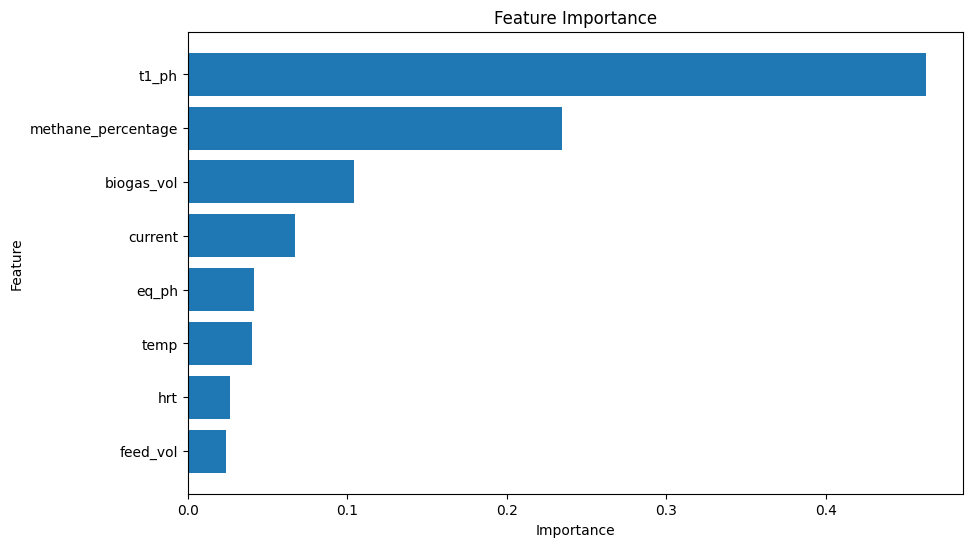

In [4]:

# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt




# Prepare the data
# Dropping the 'fostac' and 'date' columns to isolate the features
X = df_interpolated.drop(['fostac', 'date'], axis=1)
y = df_interpolated['fostac']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling
# Initialize and train the Random Forest regressor
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# Feature importance analysis
# Extract feature importances from the model
importances = model.feature_importances_
features = X_train.columns


# Sorting the features by importance
indices = np.argsort(importances)  # Get the indices of sorted importances
sorted_features = [features[i] for i in indices]  # Reorder the features
sorted_importances = importances[indices]  # Reorder the importances

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()



In [5]:

df_interpolated  = df_interpolated[['fostac', 'date', 't1_ph', 'biogas_vol', 'methane_percentage', 'current', 'temp']]
display(df_interpolated)

,fostac,date,t1_ph,biogas_vol,methane_percentage,current,temp
0,0.53,2022-06-07,7.10,1232.0,65.1,1652,36.8
1,0.34,2022-06-08,7.20,1019.0,68.0,1652,36.8
2,0.15,2022-06-09,7.30,1005.0,70.9,1652,36.8
3,0.19,2022-06-10,7.30,892.0,65.7,1652,34.8
4,0.19,2022-06-11,7.30,1100.0,65.7,1652,34.8
...,...,...,...,...,...,...,...
139,0.37,2022-10-24,7.24,2142.0,67.8,1520,26.2
140,0.37,2022-10-25,7.24,1538.5,67.8,1520,26.2
141,0.40,2022-10-26,7.03,1538.5,64.5,1638,25.3
142,0.40,2022-10-27,7.03,2856.5,64.5,1638,25.3


In [6]:
# Set seeds for reproducibility
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Data preparation (assuming df_interpolated is defined previously)
df = df_interpolated.copy()
target = 'fostac'
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.dropna(subset=[target], inplace=True)

bins = [0,0.3,0.6,0.9]  
labels = [0, 1, 2]
df['fostac_category'] = pd.cut(df[target], bins=bins, labels=labels, include_lowest=True)

# Check distribution clearly:
print(df['fostac_category'].value_counts())

# Drop rows with NaN categories (values outside bins)
df.dropna(subset=['fostac_category'], inplace=True)
df['fostac_category'] = df['fostac_category'].astype(int)

num_features = df.shape[1] - 2  # subtracting fostac and the new category column



class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['fostac_category']),
    y=df['fostac_category']
)

class_weight_dict = dict(enumerate(class_weights))
print("Class weights:", class_weight_dict)


fostac_category
1    73
0    38
2    27
Name: count, dtype: int64
Class weights: {0: np.float64(1.2105263157894737), 1: np.float64(0.6301369863013698), 2: np.float64(1.7037037037037037)}


In [7]:
# import os
# import numpy as np
# import pandas as pd
# import joblib
# import json
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.preprocessing import RobustScaler
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
# from keras_tuner import HyperModel, RandomSearch

# # Set seeds for reproducibility
# seed = 42
# np.random.seed(seed)
# tf.random.set_seed(seed)

# # Prepare data
# df = df_interpolated.copy()
# target = 'fostac'
# df['date'] = pd.to_datetime(df['date'])
# df.set_index('date', inplace=True)
# df.dropna(subset=[target], inplace=True)

# bins = [0, 0.3, 0.6, 2.0]
# labels = [0, 1, 2]
# df['fostac_category'] = pd.cut(df[target], bins=bins, labels=labels, include_lowest=True)
# df.dropna(subset=['fostac_category'], inplace=True)
# df['fostac_category'] = df['fostac_category'].astype(int)

# X = df.drop(columns=[target, 'fostac_category'])
# y = df['fostac_category']

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=seed)

# # Scale features
# scaler = RobustScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# # Save scaler
# scaler_path = os.path.join('ANN_hyperparams', 'robust_scaler.pkl')
# os.makedirs('ANN_hyperparams', exist_ok=True)
# joblib.dump(scaler, scaler_path)

# # Apply SMOTE to handle imbalance
# smote = SMOTE(random_state=seed, k_neighbors=1)
# X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# # Verify SMOTE class balance
# print(pd.Series(y_train_smote).value_counts())

# # Define a deeper neural network for classification
# class DeeperClassificationModel(HyperModel):
#     def build(self, hp):
#         model = Sequential()
#         model.add(Input(shape=(X_train_smote.shape[1],)))

#         num_layers = hp.Int('num_layers', 2, 4)
#         for i in range(num_layers):
#             model.add(Dense(hp.Int(f'units_{i}', 32, 128, 32), activation='relu'))
#             if hp.Boolean(f'batch_norm_{i}', default=True):
#                 model.add(BatchNormalization())
#             if hp.Boolean(f'dropout_{i}', default=True):
#                 model.add(Dropout(hp.Float(f'dropout_rate_{i}', 0.1, 0.5, 0.1)))

#         model.add(Dense(3, activation='softmax'))

#         model.compile(
#             optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
#             loss='sparse_categorical_crossentropy',
#             metrics=['accuracy']
#         )
#         return model

# # Early stopping
# early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# # Hyperparameter tuning with RandomSearch
# deeper_tuner = RandomSearch(
#     DeeperClassificationModel(),
#     objective='val_accuracy',
#     max_trials=15,
#     executions_per_trial=2,
#     directory='ANN_hyperparams/deeper_classification_tuner',
#     project_name='deeper_classification_model',
#     seed=seed,
#     overwrite=True
# )

# # Start hyperparameter search
# deeper_tuner.search(
#     X_train_smote, y_train_smote,
#     epochs=100,
#     validation_data=(X_val_scaled, y_val),
#     batch_size=16,
#     callbacks=[early_stopping],
#     verbose=1
# )

# # Retrieve and explicitly build best classification model
# best_hp = deeper_tuner.get_best_hyperparameters(num_trials=1)[0]
# best_model = DeeperClassificationModel().build(best_hp)

# # Train the best model explicitly
# history = best_model.fit(
#     X_train_smote, y_train_smote,
#     epochs=100,
#     validation_data=(X_val_scaled, y_val),
#     batch_size=16,
#     callbacks=[early_stopping],
#     verbose=1
# )

# # Save best hyperparameters
# hyperparams_path = os.path.join('ANN_hyperparams', 'best_deeper_classification_hyperparameters.json')
# with open(hyperparams_path, 'w') as hp_file:
#     json.dump(best_hp.values, hp_file, indent=4)

# # Save the final classification model
# model_path = os.path.join('ANN_hyperparams', 'best_deeper_classification_model.keras')
# best_model.save(model_path)

In [8]:
import os
import numpy as np
import pandas as pd
import joblib
import json
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from keras_tuner import HyperModel, RandomSearch

# Set seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Prepare data
df = df_interpolated.copy()
target = 'fostac'
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.dropna(subset=[target], inplace=True)

bins = [0, 0.3, 0.6, 2.0]
labels = [0, 1, 2]
df['fostac_category'] = pd.cut(df[target], bins=bins, labels=labels, include_lowest=True)
df.dropna(subset=['fostac_category'], inplace=True)
df['fostac_category'] = df['fostac_category'].astype(int)

X = df.drop(columns=[target, 'fostac_category'])
y = df['fostac_category']

# Scale features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Save scaler
scaler_path = os.path.join('ANN_hyperparams', 'robust_scaler.pkl')
os.makedirs('ANN_hyperparams', exist_ok=True)
joblib.dump(scaler, scaler_path)

# Define a deeper neural network for classification
class DeeperClassificationModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Input(shape=(X_scaled.shape[1],)))

        num_layers = hp.Int('num_layers', 2, 4)
        for i in range(num_layers):
            model.add(Dense(hp.Int(f'units_{i}', 32, 128, 32), activation='relu'))
            if hp.Boolean(f'batch_norm_{i}', default=True):
                model.add(BatchNormalization())
            if hp.Boolean(f'dropout_{i}', default=True):
                model.add(Dropout(hp.Float(f'dropout_rate_{i}', 0.1, 0.5, 0.1)))

        model.add(Dense(3, activation='softmax'))

        model.compile(
            optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

# Early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Stratified K-Fold Cross-Validation
n_splits = 5  # Number of folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)

fold_results = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_scaled, y)):
    print(f"\n🔄 Training on Fold {fold+1}/{n_splits}")

    # Split the dataset for the current fold
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Apply SMOTE to handle class imbalance
    smote = SMOTE(random_state=seed, k_neighbors=1)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Verify SMOTE class balance
    print(pd.Series(y_train_smote).value_counts())

    # Hyperparameter tuning with RandomSearch for each fold
    deeper_tuner = RandomSearch(
        DeeperClassificationModel(),
        objective='val_accuracy',
        max_trials=15,
        executions_per_trial=2,
        directory='ANN_hyperparams/deeper_classification_tuner',
        project_name=f'deeper_classification_model_fold{fold+1}',
        seed=seed,
        overwrite=True
    )

    # Start hyperparameter search for this fold
    deeper_tuner.search(
        X_train_smote, y_train_smote,
        epochs=100,
        validation_data=(X_val, y_val),
        batch_size=16,
        callbacks=[early_stopping],
        verbose=1
    )

    # Retrieve and explicitly build the best classification model for this fold
    best_hp = deeper_tuner.get_best_hyperparameters(num_trials=1)[0]
    best_model = DeeperClassificationModel().build(best_hp)

    # Train the best model explicitly on this fold
    history = best_model.fit(
        X_train_smote, y_train_smote,
        epochs=100,
        validation_data=(X_val, y_val),
        batch_size=16,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate performance on this fold
    val_accuracy = best_model.evaluate(X_val, y_val, verbose=0)[1]
    print(f"Fold {fold+1} Validation Accuracy: {val_accuracy:.4f}")
    fold_results.append(val_accuracy)

# Compute and print the final average performance
avg_accuracy = np.mean(fold_results)
print(f"\n📊 **Final Average Validation Accuracy Across {n_splits} Folds: {avg_accuracy:.4f}**")

# Save best hyperparameters
hyperparams_path = os.path.join('ANN_hyperparams', 'best_deeper_classification_hyperparameters.json')
with open(hyperparams_path, 'w') as hp_file:
    json.dump(best_hp.values, hp_file, indent=4)

# Save the final classification model
model_path = os.path.join('ANN_hyperparams', 'best_deeper_classification_model.keras')
best_model.save(model_path)


Trial 1 Complete [00h 00m 14s]
val_accuracy: 0.8793103396892548

Best val_accuracy So Far: 0.8793103396892548
Total elapsed time: 00h 00m 14s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
4                 |3                 |num_layers
96                |32                |units_0
True              |False             |batch_norm_0
False             |False             |dropout_0
0.5               |0.5               |dropout_rate_0
32                |64                |units_1
True              |True              |batch_norm_1
False             |False             |dropout_1
0.2               |0.3               |dropout_rate_1
0.00097493        |0.00030693        |learning_rate
128               |32                |units_2
False             |True              |batch_norm_2
False             |True              |dropout_2
0.3               |0.1               |dropout_rate_2

Epoch 1/100


2025-03-14 15:30:31.166494: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5133 - loss: 1.0627 - val_accuracy: 0.6207 - val_loss: 1.0553
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7992 - loss: 0.4924 - val_accuracy: 0.7241 - val_loss: 1.0339
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8846 - loss: 0.3576 - val_accuracy: 0.7931 - val_loss: 1.0105
Epoch 4/100


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
              precision    recall  f1-score   support

       0-0.3       1.00      0.29      0.44         7
     0.3-0.6       0.57      0.93      0.70        14
     0.6-0.9       0.75      0.38      0.50         8

    accuracy                           0.62        29
   macro avg       0.77      0.53      0.55        29
weighted avg       0.72      0.62      0.58        29



2025-03-13 23:52:09.121154: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


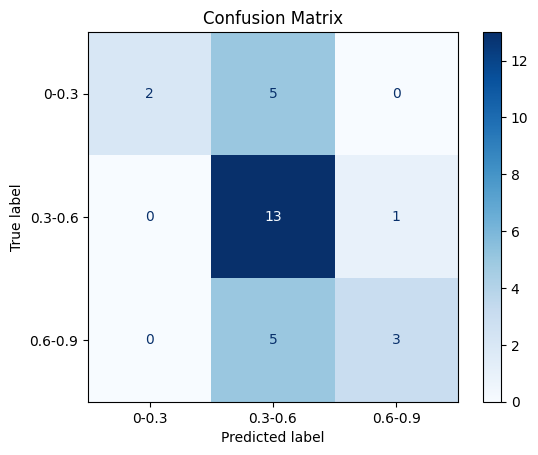

In [ ]:
# Generate predictions as class labels
y_pred_prob = best_model.predict(X_val_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)


print(classification_report(y_val, y_pred, target_names=['0-0.3', '0.3-0.6', '0.6-0.9']))

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0-0.3', '0.3-0.6', '0.6-0.9'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('ANN_hyperparams/figures/classification_confusion_matrix.png')
plt.show()
